In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
#GIT = 'https://github.com/tyokokur/tmpdat/raw/main/sysg3/'
#''' If SSL error _ssl.c:997: 
#    pip install --upgrade certifi'''

from sysg3_data import *

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [4]:
## Files needed locally
f1_fnames = []

f2_fnames = ['ph_a30s05e3_cyl.dat', 'ph_a30s020_cyl.dat', 'ph_a30s030_cyl-str.dat', 'ph_a30s055_str.dat']
f2_boxes  = []

f4_fnames = ['ph_a20s020_mic-mul.dat', 'ph_a30s020_str-mul.dat', 'ph_a30s040_hom-mul.dat']
f4_boxes  = []

# Figure 3

ValueError: All-NaN slice encountered

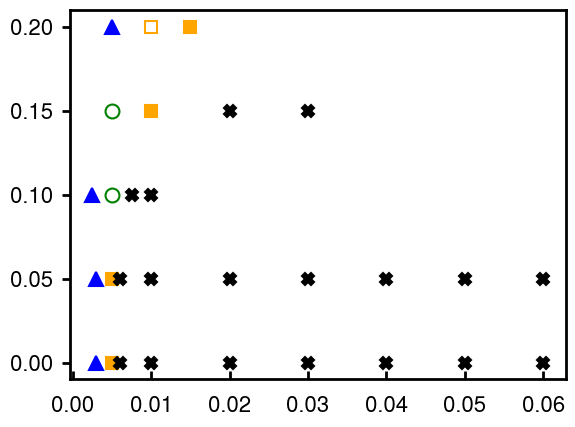

In [24]:
morph_ms = {
    'mic': {'marker':'^', 'c':'blue'  , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'purple', 'ms':10},
    'cyl-str': {'marker':'*', 'c':'red', 'ms':12},
    'str': {'marker':'s', 'c':'orange', 'ms':8 }, 
    'hol': {'marker':'o', 'c':'green' , 'ms':10}, 
    'hom': {'marker':'X', 'c':'black' , 'ms':8}
}
leg_ms = [Line2D([0],[0], **morph_ms[mor], lw=0) for mor in morph_ms.keys()]
leg_labs=['Micelle', 'Cylinder', 'Cyl-Str', 'Stripe', 'Hole', 'Homogeneous']

def get_Morph(a,s):
    AX = All.all[All.all.loc[:,'alpha'] == a]
    AXSY = AX[AX.loc[:,'sigma'] == s].reset_index()
    return AXSY.morph[np.nanargmin([i.minF() for i in AXSY.data])], min([i.minF() for i in AXSY.data]), AXSY.multi[np.nanargmin([i.minF() for i in AXSY.data])], AXSY.done.to_list()

for (a,s) in [(0.0, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 5e-03, 7.5e-03, 1e-02)] +\
             [(0.15, i) for i in (5e-03, 1e-02, 2e-02, 3e-02)] +\
             [(0.20, i) for i in (5e-03, 1e-02, 0.015, 0.0175, 2e-02)] +\
             [(0.225, i) for i in (0.025, 0.0275, 0.030)] +\
             [(0.25, i) for i in (2e-02, 0.025, 0.027, 3e-02, 0.0325)] +\
             [(0.30, i) for i in (0.0025, 5e-03, 2e-02, 0.025, 3e-02, 0.0325, 0.035, 4e-02, 0.045, 5e-02, 0.055)]:
    morph, minF, mul, done = get_Morph(a,s)
    x,y,mor = s, a, morph
    
    if done == [True]*len(done): 
        if mul:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc=tjy.lighten_color(morph_ms[mor]['c'], 0.3))
        else:     plt.plot(x,y, lw=0, **morph_ms[mor])
    else:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc='w')

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$')
plt.xlim(0, 0.060)
plt.ylabel(r'$\alpha$')
plt.ylim(-0.025,0.325)
plt.legend(leg_ms, leg_labs, loc=(1.02,0.3))
tjy.ticks()

# (0.0, 3e-03), (0.0, 5e-03), (0.0, 6e-03),  (0.0, 1e-02), (0.0, 2e-02), 
    #               (0.0, 3e-02), (0.0, 4e-02), (0.0, 5e-02), (0.0, 6e-02), #(0.0, 7e-03),
    #           (0.05,3e-03), (0.05,5e-03), (0.05, 6e-03), (0.05, 1e-02), (0.05, 2e-02), 
    #               (0.05, 3e-02), (0.05, 4e-02), (0.05, 5e-02), (0.05, 6e-02),#(0.05, 7e-03),
    #           (0.1, 2.5e-03), (0.1, 5e-03), (0.1, 7.5e-03), (0.1, 1e-02),
    #           (0.15,5e-03), (0.15,0.010), (0.15, 0.020), (0.15, 0.030),
    #           (0.2, 5e-03), (0.2, 0.010), (0.2, 0.015), (0.2,, 0 0.0175), (0.2.020), #(0.2, 0.022), (0.2, 0.025), (0.2, 0.027),
    #           (0.225, 0.025), (0.225, 0.0275), (0.225, 0.030),
    #           (0.25, 0.020), (0.25, 0.025), (0.25,0.027), (0.25,0.030), (0.25, 0.0325),
    #           (0.3, 0.0025), (0.3, 0.005), (0.3, 0.020), (0.3, 0.025), (0.3, 0.030), (0.3, 0.0325), 
    #               (0.3, 0.035), (0.3, 0.04), (0.3, 0.045), (0.3, 0.050), (0.3, 0.055)]:

In [16]:
[(0.0, i) for i in (1e-03, 1e-02, 0.1)] +\
    [(0.1, i) for i in (1e-04, 1e-2)]

[(0.0, 0.001), (0.0, 0.01), (0.0, 0.1), (0.1, 0.0001), (0.1, 0.01)]

In [23]:
for (a,s) in [(0.0, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 5e-03, 7.5e-03, 1e-02)] +\
             [(0.15, i) for i in (5e-03, 1e-02, 2e-02, 3e-02)] +\
             [(0.20, i) for i in (5e-03, 1e-02, 0.015, 0.0185, 2e-02)] +\
             [(0.225, i) for i in (0.025, 0.0275, 0.030)] +\
             [(0.25, i) for i in (2e-02, 0.025, 0.027, 3e-02, 0.0325)] +\
             [(0.30, i) for i in (0.0025, 5e-03, 2e-02, 0.025, 3e-02, 0.0325, 0.035, 4e-02, 0.045, 5e-02, 0.055)]:
    print (a,s)

0.0 0.003
0.0 0.005
0.0 0.006
0.0 0.01
0.0 0.02
0.0 0.03
0.0 0.04
0.0 0.05
0.0 0.06
0.05 0.003
0.05 0.005
0.05 0.006
0.05 0.01
0.05 0.02
0.05 0.03
0.05 0.04
0.05 0.05
0.05 0.06
0.1 0.0025
0.1 0.005
0.1 0.0075
0.1 0.01
0.15 0.005
0.15 0.01
0.15 0.02
0.15 0.03
0.2 0.005
0.2 0.01
0.2 0.015
0.2 0.0185
0.2 0.02
0.225 0.025
0.225 0.0275
0.225 0.03
0.25 0.02
0.25 0.025
0.25 0.027
0.25 0.03
0.25 0.0325
0.3 0.0025
0.3 0.005
0.3 0.02
0.3 0.025
0.3 0.03
0.3 0.0325
0.3 0.035
0.3 0.04
0.3 0.045
0.3 0.05
0.3 0.055
